# Noise Analysis
In thi notebook we test the effect of noisy inputs to the models.

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)
from plotting_utility import *

# ECON model (Autoencoder)
we focus our analysis on the encoder which will be deploy on an ASIC.

load the results relative to the performances

In [4]:
tags = ["baseline", "JREG_0.1", "LIP_0.00001",]
num_bits = [1, 5, 10, 20, 50, 100]

load_econ_bit_flip(tags, num_bits)

### Comparison of the mitigation techniques

In [6]:
regularizer = ["Baseline", "Jacobian (δ=1e-1)", "Orthogonality (δ=1e-5)"]
df = pd.read_csv("./results/econ/bit_flip.csv")

Comparison on clean data:

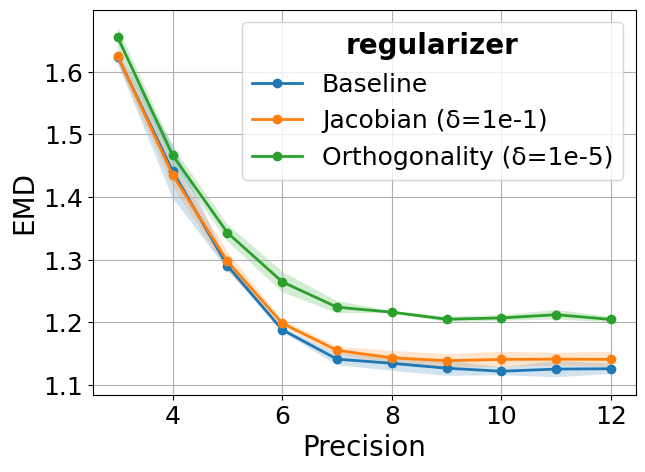

In [8]:
selected_df = df[(df['flip_strategy'] == "clean") & 
                 (df['# bits flipped'] == 0) & 
                 (df['regularizer'].isin(regularizer))]

plot_precision_vs_emd(selected_df, "regularizer", True, plot_legend=True)

Test the model perturbed flipping the most sensitive bits with FKeras:

--------------------------------------------------------------------------------
num bits: 1


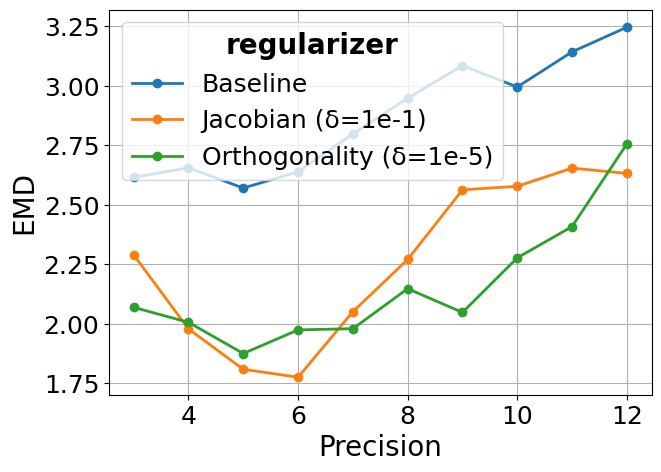

--------------------------------------------------------------------------------
num bits: 5


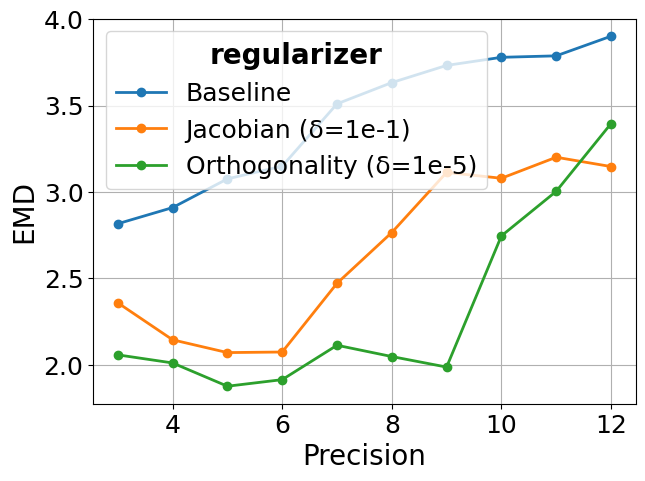

--------------------------------------------------------------------------------
num bits: 10


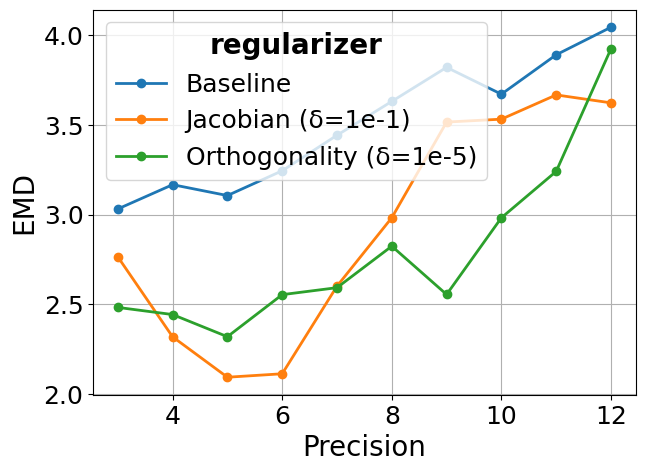

--------------------------------------------------------------------------------
num bits: 20


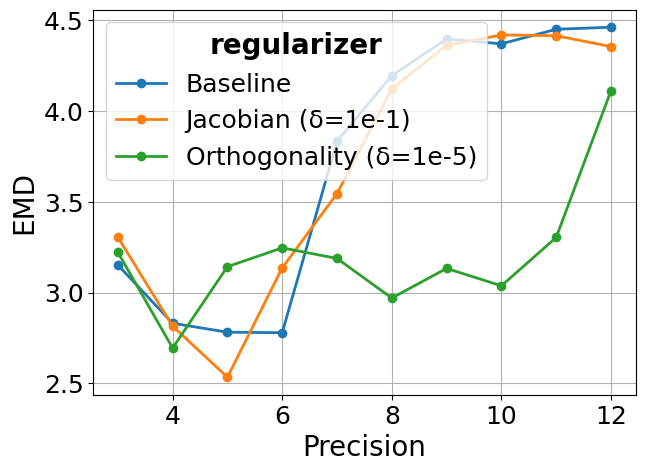

In [9]:
# select the feature
FLIP_STRATEGY = 'fkeras_bit_flip'
NUM_BITS = [1, 5, 10, 20]

for bits in NUM_BITS:
    selected_df = df[(df['flip_strategy'] == 'fkeras_bit_flip') & 
                     (df['# bits flipped'] == bits) & 
                     (df['regularizer'].isin(regularizer))]
    print(80*'-')
    print(f"num bits: {bits}")
    plot_precision_vs_emd(selected_df, "regularizer", plot_legend=True)

## Ablation studies

Compare flipping random bits vs. FKeras methodology:

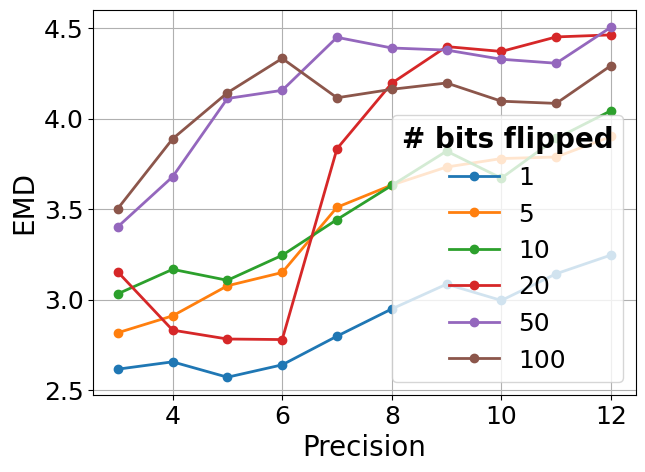

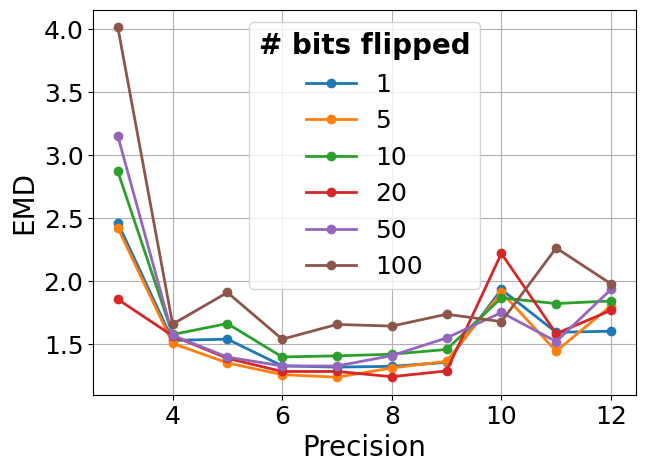

In [11]:
selected_df = df[(df['flip_strategy'] == 'fkeras_bit_flip') & 
                 (df['precision'].isin(range(3, 13))) &
                 (df['regularizer'] == "Baseline")]

plot_precision_vs_emd(selected_df, "# bits flipped", plot_legend=True)

selected_df = df[(df['flip_strategy'] == 'random_bit_flip') & 
                 (df['precision'].isin(range(3, 13))) &
                 (df['regularizer'] == "Baseline")]

plot_precision_vs_emd(selected_df, "# bits flipped", plot_legend=True)

# Fusion model (Regression CNN)